# Get top-fitting growth and decline words

In [7]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import get_growth_words, get_growth_decline_words_and_params

## Load data

In [3]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm_log.tsv', sep='\t', index_col=0)
print(tf.head())

       2013-06   2013-07   2013-08   2013-09   2013-10   2013-11   2013-12  \
just -2.267228 -2.264805 -2.266678 -2.268449 -2.268265 -2.267388 -2.267818   
like -2.295678 -2.295178 -2.296224 -2.299470 -2.300128 -2.301271 -2.301898   
can  -2.409923 -2.413153 -2.410532 -2.413738 -2.408188 -2.398326 -2.394363   
one  -2.444079 -2.455069 -2.455124 -2.457127 -2.453421 -2.446522 -2.450686   
get  -2.471086 -2.466172 -2.461398 -2.463402 -2.453960 -2.459005 -2.459616   

       2014-01   2014-02   2014-03    ...      2015-08   2015-09   2015-10  \
just -2.270001 -2.269298 -2.268909    ...    -2.268765 -2.268793 -2.271295   
like -2.299020 -2.298666 -2.298165    ...    -2.291957 -2.293772 -2.300393   
can  -2.394979 -2.397980 -2.397843    ...    -2.396403 -2.399594 -2.405326   
one  -2.453414 -2.457965 -2.458524    ...    -2.464996 -2.465310 -2.470918   
get  -2.462385 -2.462762 -2.464554    ...    -2.458141 -2.454706 -2.456219   

       2015-11   2015-12   2016-01   2016-02   2016-03   2016-

In [110]:
growth_words = get_growth_words()
decline_words, decline_params = get_growth_decline_words_and_params()
# need to differentiate logistic and piecewise decline
logistic_decline_words = pd.read_csv('../../data/frequency/word_lists/2013_2016_logistic_growth_decline_words.csv').loc[:, 'word']
piecewise_decline_words = pd.read_csv('../../data/frequency/word_lists/2013_2016_piecewise_growth_decline_words.csv').loc[:, 'word']
logistic_decline_words = list(set(logistic_decline_words) & set(decline_words) - set(growth_words))
piecewise_decline_words = list(set(piecewise_decline_words) & set(decline_words) - set(growth_words))

In [23]:
# load parameters
logistic_params = pd.read_csv('../../data/frequency/2013_2016_tf_norm_logistic_params.tsv', sep='\t', index_col=0)
piecewise_params = pd.read_csv('../../data/frequency/2013_2016_tf_norm_log_2_piecewise_discrete.tsv', sep='\t', index_col=0)
print(logistic_params.head())
print(piecewise_params.head())

            loc     scale        R2
just  15.004176  7.921824 -0.675196
like  17.854175  7.871330 -0.581077
can   17.355896  6.778966  0.255427
one    8.869916  6.444788  0.512292
get   18.705448  6.864276  0.208423
         t        m1        m2         b        R2
just   3.0  0.000275 -0.000261 -2.266512  0.203569
like  25.0  0.000195 -0.000272 -2.299323 -0.055207
can    7.0  0.002810 -0.000260 -2.415319  0.496094
one   27.0 -0.000517 -0.000142 -2.450930  0.824565
get    4.0  0.002783 -0.000029 -2.469688  0.272360


In [15]:
from scipy.stats import spearmanr
# recompute spearman for some reason
N = tf.shape[1]
X = pd.np.arange(N)
growth_params = tf.apply(lambda y: pd.Series(spearmanr(X, y)), axis=1)
growth_params.columns = ['spearman', 'pval']
print(growth_params.head())

      spearman          pval
just -0.363707  2.921923e-02
like  0.148777  3.864932e-01
can   0.016988  9.216622e-01
one  -0.914801  6.065789e-15
get   0.176062  3.043542e-01


## Get top-fitting candidates

In [21]:
growth_scores = growth_params.loc[growth_words, 'spearman'].sort_values(inplace=False, ascending=False)
print(growth_scores.head(10))

tho         0.999228
tbh         0.998713
shitpost    0.995624
lmao        0.995367
idk         0.995367
smh         0.995109
tbf         0.994852
jfc         0.994852
weeb        0.993050
lowkey      0.991506
Name: spearman, dtype: float64


In [111]:
decline_logistic_scores = logistic_params.loc[logistic_decline_words, 'R2'].sort_values(inplace=False, ascending=False)
decline_piecewise_scores = piecewise_params.loc[piecewise_decline_words, 'R2'].sort_values(inplace=False, ascending=False)
print(decline_logistic_scores.head(10))
print(decline_piecewise_scores.head(10))

drippers     0.884420
dripper      0.884200
obeasts      0.861511
atty         0.861140
fogger       0.856075
modz         0.838087
unleveled    0.837892
oooh         0.829304
soldiery     0.822479
shitlord     0.821818
Name: R2, dtype: float64
brojob         0.955334
nparent        0.943019
terpers        0.934937
rekd           0.927191
aerotank       0.869460
fogger         0.858199
cishet         0.850894
masterrace     0.843438
nicknamable    0.843242
doge           0.839712
Name: R2, dtype: float64


In [116]:
example_growth_words = ['tho', 'tbh', 'shitpost', 'lmao', 'idk']
example_decline_logistic_words = ['drippers', 'dripper', 'modz', 'atty', 'fogger']
example_decline_piecewise_words = ['brojob', 'nparent', 'fogger', 'terpers', 'rekd']

## Plot words
Let's be fancy and use a ~shared y axis~ for the separate plots.

In [107]:
from math import ceil
def plot_time_series(stat, words, x_lab='Month', y_lab='f', title=''):
    N = stat.shape[1]
    X = pd.np.arange(N)
    W = len(words)
    stat_color = 'blue'
    stat_linestyle = '-'
    height = 3
    plot_width = 3.
    width = W*plot_width
    label_size = 18
    title_size = 24
    sub_title_size = 16
    x_lab_offset = [0.5, -0.06]
    
    # get datetime for xticks
    xlabels = stat.columns.tolist()
    xtick_count = 4
    xlabel_interval = int(ceil(N / (xtick_count))) + 1
    xticks, xlabels = zip(*zip(X, xlabels)[::xlabel_interval])
    tick_size = 10
    
    # make subplots
    f, axs = plt.subplots(1, W, sharey=True, figsize=(width, height))
    for i, w in enumerate(words):
        ax = axs[i]
        ax.plot(X, stat.loc[w], color=stat_color, linestyle=stat_linestyle)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels, fontsize=tick_size)
        if(i == 0):
            ax.set_ylabel(y_lab, fontsize=label_size)
        ax.set_title(w, fontsize=sub_title_size)
    f.suptitle(title, fontsize=title_size, y=1.20)
    f.text(x_lab_offset[0], x_lab_offset[1], x_lab, fontsize=label_size)
    plt.tight_layout()

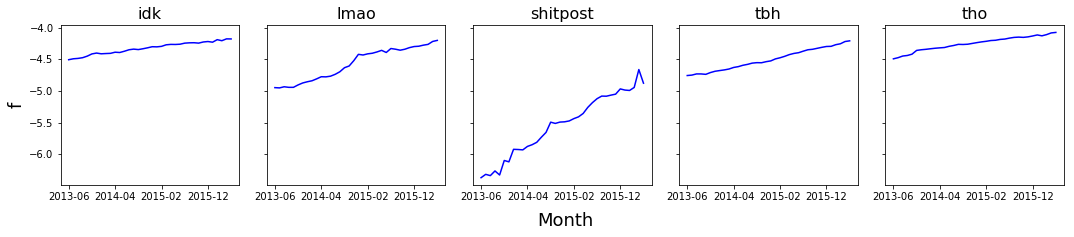

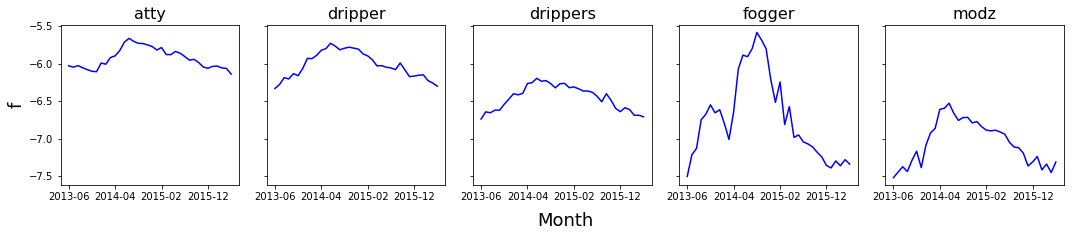

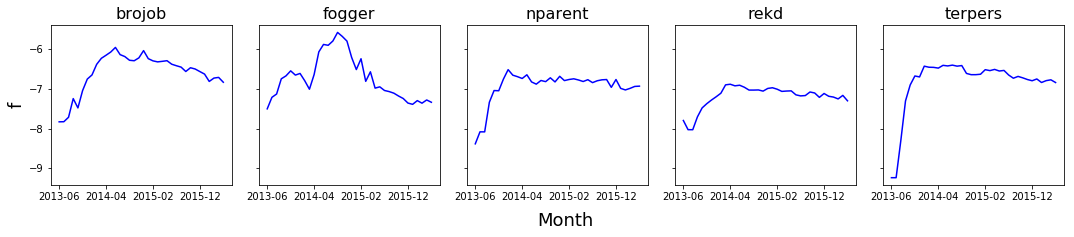

In [118]:
from itertools import izip
word_categories = ['growth', 'logistic-decline', 'piecewise-decline']
word_lists = [example_growth_words, example_decline_logistic_words, example_decline_piecewise_words]
for word_category, word_list in izip(word_categories, word_lists):
    plot_time_series(tf, sorted(word_list))
    plt.show()